<a href="https://colab.research.google.com/github/Lor3nzoVis3/DeepLearning_ProjectLV_GB/blob/master/FromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
"""
@authors: LorenzoVisentini and Gianmarco Bolcato
"""

modelName = "FromScratch"


#import
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#keras
# import keras
from keras.layers import Dense, Dropout, Flatten, Conv2D
from keras.layers import BatchNormalization, MaxPooling2D, Dropout, AveragePooling2D
from keras.models import Model, Sequential
from keras import optimizers
from keras.preprocessing.image  import ImageDataGenerator

In [23]:
# link with Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [24]:
#Images parameters
img_width = 178 
img_height = 218
img_target_size = (img_height, img_width)
shape = (img_height, img_width, 3)

# Source Light
# Jupyter notebook paths
train_dir = './source_light/train'
val_dir = './source_light/val' 
test_dir = './source_light/test' 

# Google Colab paths
# train_dir = '/content/drive/My Drive/Deep Learning Project - Image Classification/source_light/train'
# val_dir = '/content/drive/My Drive/Deep Learning Project - Image Classification/source_light/val' 
# test_dir = '/content/drive/My Drive/Deep Learning Project - Image Classification/source_light/test' 

In [25]:
n_classes = 3

# Hyperparameters
batch_size = 32
epochs = 10
conv_depth = 8
drop_rate = 0.6
lr = 0.002

In [26]:
#model
model = Sequential()

model.add(Conv2D(conv_depth, kernel_size = (3,3), activation= 'relu', input_shape = shape))
model.add(Conv2D(conv_depth, kernel_size = (3,3), activation= 'relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2,2),strides = 2))
model.add(Dropout(drop_rate))

model.add(Conv2D(conv_depth, kernel_size = (3,3), activation= 'relu'))
model.add(Conv2D(conv_depth, kernel_size = (3,3), activation= 'relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2,2),strides = 2))
model.add(Dropout(drop_rate))

model.add(Conv2D(conv_depth*2, kernel_size = (5,5), activation= 'relu'))
model.add(Conv2D(conv_depth*2, kernel_size = (5,5), activation= 'relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2,2),strides = 2))
model.add(Dropout(drop_rate))

model.add(Conv2D(conv_depth*2, kernel_size = (5,5), activation= 'relu'))
model.add(Conv2D(conv_depth*2, kernel_size = (5,5), activation= 'relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2,2),strides = 2))
model.add(Dropout(drop_rate))

model.add(Flatten())
model.add(Dense(512, activation= 'relu'))
model.add(Dense(512, activation= 'relu'))
model.add(BatchNormalization())
model.add(Dense(n_classes, activation= 'softmax'))

# custom optimizer
opt = optimizers.Adam(learning_rate=lr)

model.compile(optimizer = opt,
              loss = 'categorical_crossentropy',  #because we have 3 possible outputs
              metrics = ['accuracy'])

In [27]:
# preprocessing
# https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/
# https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/

train_gen = ImageDataGenerator(width_shift_range=[0,0.2],
                            height_shift_range=[0,0.2],
                            zoom_range=[0.8,1.0],
                            fill_mode="nearest")
# train_gen = ImageDataGenerator()


test_gen = ImageDataGenerator()

train_generator = train_gen.flow_from_directory(directory=train_dir,
                                                    target_size=img_target_size,
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode="categorical",
                                                    shuffle=True,
                                                    seed=42
                                                    )

val_generator = test_gen.flow_from_directory(directory=val_dir,
                                                    target_size=img_target_size,
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode="categorical",
                                                    shuffle=True,
                                                    seed=42
                                                    )

test_generator = test_gen.flow_from_directory(directory = test_dir,
                                                    target_size = img_target_size,
                                                    color_mode="rgb",
                                                    batch_size = batch_size,
                                                    class_mode = "categorical",
                                                    shuffle=True,
                                                    seed=42
                                                )

Found 5998 images belonging to 3 classes.
Found 2501 images belonging to 3 classes.
Found 1501 images belonging to 3 classes.


In [ ]:
history = model.fit_generator(generator = train_generator,
                             steps_per_epoch = train_generator.n//batch_size,
                             epochs = epochs,
                             validation_data = val_generator,
                             validation_steps=val_generator.n//batch_size
                             )

Epoch 1/10
187/187 [==============================] - 37s 200ms/step - loss: 1.2534 - accuracy: 0.4596 - val_loss: 0.7630 - val_accuracy: 0.6514
Epoch 2/10
187/187 [==============================] - 38s 201ms/step - loss: 0.9502 - accuracy: 0.5513 - val_loss: 0.6403 - val_accuracy: 0.7327
Epoch 3/10
187/187 [==============================] - 37s 200ms/step - loss: 0.8564 - accuracy: 0.6056 - val_loss: 0.4681 - val_accuracy: 0.7051
Epoch 4/10
187/187 [==============================] - 37s 199ms/step - loss: 0.7287 - accuracy: 0.6859 - val_loss: 0.4622 - val_accuracy: 0.8497
Epoch 5/10
 81/187 [===========>..................] - ETA: 19s - loss: 0.6708 - accuracy: 0.7130

In [ ]:
# consider highlight the different values of hyperparameters used
# OR orient o SL source light, Bs batch size, Ep epochs, Dr drop rate, Lr learning rate
# CHECK ALWAYS BOOLEAN PATCH VALUES (on top)

# create models folder if doesn't exist
path_models = './Models'
if os.path.exists(path_models) == False:
    os.makedirs(path_models)
else: 
    print('Folder Models already exists')
    
# save model and history
# file_model = '/content/drive/My Drive/Deep Learning Project - Image Classification/Models/'+ modelName + 'SL' + '_Bs' + str(batch_size) + '_Ep' + str(epochs) + '_Dr' + str(drop_rate) + '_Lr' + str(lr)
file_model = './Models/'+ modelName + 'SL' + '_Bs' + str(batch_size) + '_Ep' + str(epochs) + '_Dr' + str(drop_rate) + '_ConvD' + str(conv_depth) +'_Lr' + str(lr)
if patch == True:
    file_model = file_model + '_patched'
    model.save(file_model + '.h5')
else:
    model.save(file_model + '.h5')
print(file_model)

#save history
file_hist = file_model + '.csv'
df_history = pd.DataFrame(history.history)
with open(file_hist, 'w') as file:
    df_history.to_csv(file)

/content/drive/My Drive/Deep Learning Project - Image Classification/Models/FaceOrientationFromScratch_Dropout0.7_64_10_16


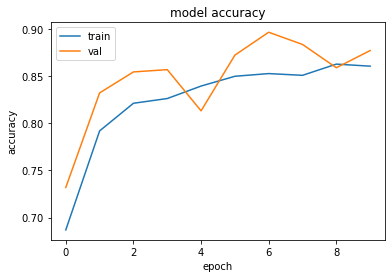

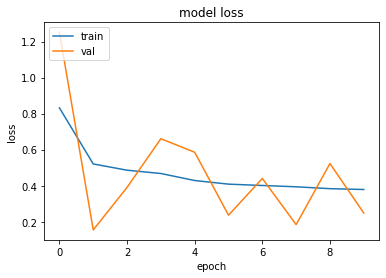

In [21]:
#plot results
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#evaluation
# https://stackoverflow.com/questions/40564936/keras-what-is-the-difference-between-model-evaluate-generator-and-model-predict
steps = test_generator.n // test_generator.batch_size

accuracy_ontest = model.evaluate_generator(test_generator, steps)
# predictions_ontest = model.predict_generator(test_generator, steps)
print(accuracy_ontest)
# print(predictions_ontest)

[0.5681671500205994, 0.7801339030265808]
[[9.8549992e-01 1.2812923e-02 1.6871827e-03]
 [9.6882105e-01 2.9962994e-02 1.2159452e-03]
 [9.4868684e-01 5.2116010e-03 4.6101529e-02]
 ...
 [5.3691190e-01 4.6215317e-01 9.3489233e-04]
 [9.6647537e-01 2.9924531e-02 3.6000514e-03]
 [9.6090108e-01 3.5115849e-02 3.9830389e-03]]
